This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


Load the data

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df=pd.read_csv('tmdb-movies.csv')
#df.head(5)

Q1) Show the names top 10 highest budget movies and plot the bar graph original title vs budget

This is the top 10 very high budget movies .We can see that Avenger-Age of Ultron is very high budget movie and second is Harry potter and half deadly prince.

In [21]:
#top_bud=df.groupby('original_title')['budget_adj'].nlargest(10)
top_bud=df.nlargest(10,'budget_adj',keep='first')
#top_bud.count()

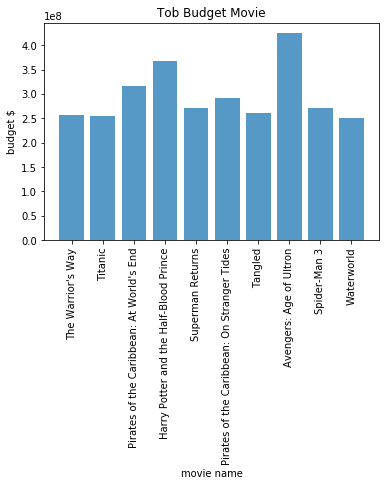

In [22]:
plt.bar(top_bud['original_title'],top_bud['budget_adj'],alpha=0.75)
plt.title('Tob Budget Movie')
plt.xlabel('movie name')
plt.xticks(top_bud['original_title'], rotation='vertical')   
plt.ylabel('budget $')
plt.figure(figsize=(15,7))
plt.show()

In [23]:

#top_revenue=df.nlargest(10,'revenue_adj',keep='first')


In [24]:
'''plt.bar(top_revenue['original_title'],top_revenue['revenue_adj'],alpha=0.75)
plt.title('Tob Revenue Movie')
plt.xlabel('movie name')
plt.xticks(top_bud['original_title'], rotation='vertical')   
plt.ylabel('revenue $')
plt.figure(figsize=(15,7))
plt.show()'''

"plt.bar(top_revenue['original_title'],top_revenue['revenue_adj'],alpha=0.75)\nplt.title('Tob Revenue Movie')\nplt.xlabel('movie name')\nplt.xticks(top_bud['original_title'], rotation='vertical')   \nplt.ylabel('revenue $')\nplt.figure(figsize=(15,7))\nplt.show()"

Q2)Show the name of top 10 popular movies , plot the bar graph between original title and their poularity

This graph is showing the top 10 popular movies.We can see that most popular movie is Captain America:The winter soldier and second most popular is guardian of galaxy.

In [25]:
popular_movie=df.nlargest(10,'popularity',keep='first')

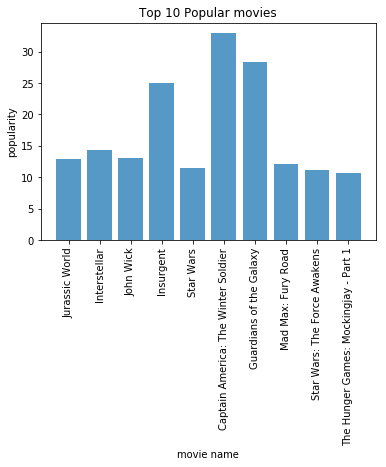

In [26]:
plt.bar(popular_movie['original_title'],popular_movie['popularity'],alpha=0.75)
plt.title('Top 10 Popular movies')
plt.xlabel('movie name')
plt.xticks(popular_movie['original_title'], rotation='vertical')   
plt.ylabel('popularity')
plt.figure(figsize=(15,7))
plt.show()

In [27]:
director_movie=df['director'].value_counts().nlargest(10)
director_movie

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

Q3)Which director have done most movies.Show the top 10 director in terms of number of movies on bar graph.

This graph  shows the maximum number of movies done by director .We can see that Woody-Allen has done 40plus movies,which is the highest movie done by any director.Second is Clint Eastwood .He has done 30 plus movies.

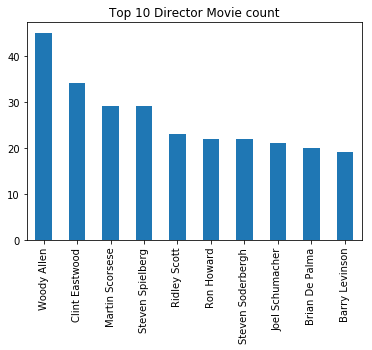

In [28]:
director_movie=df['director'].value_counts().nlargest(10)
director_movie.plot.bar(title='Top 10 Director Movie count')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Q4)Show the relation between budget vs revenue.Analyse the graph and give a conclusion on high budget movies vs high revnue?

This is budget vs revenue.We can see from the graph most of movies has good revenue accordind to budget.Some of the movies which has high budget.But it has less revenue.Some of the movies having low budget and has very high revenue.

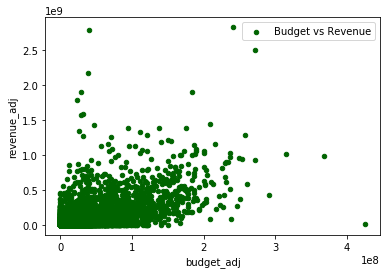

In [30]:
df.plot.scatter(x='budget_adj',y='revenue_adj',color='DarkGreen',label='Budget vs Revenue')

Q5)Show the popularity of movie according to budget.Analyze the graph and give conclusion on the relation between high budget movie and their popularity?

We can see from the graph budget and popularity are interrelated to each other.Some of the average budget movies has very high poularity.Very few of the very high budget has less popularity.

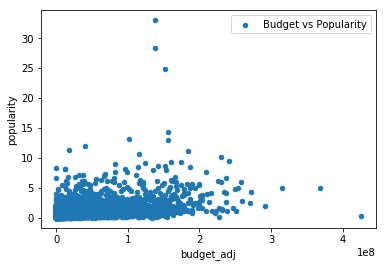

In [31]:
df.plot.scatter(x='budget_adj',y='popularity',label='Budget vs Popularity')

Q6)Group the revenue by month and show that which months have high revenues.?
Which will help producer to decide the release date of movies.Plot the graph which will help producer easily to choose his release month

This is the graph between release date and revenue.We can see clearly from the graph june and december has very high revenue.December is holiday time .June is summer vacation time.I think most of the high budget movie will try to release during this june or December

In [32]:
df.dropna()
df['release_date']=pd.to_datetime(df['release_date'])

In [33]:
#df['release_date']

In [34]:
release_df=df.groupby(df['release_date'].dt.strftime('%B'))['revenue_adj'].sum().sort_values()

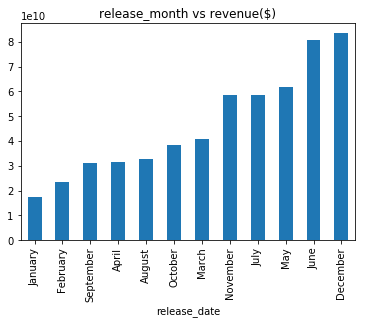

In [35]:
release_df.plot.bar(title="release_month vs revenue($)")